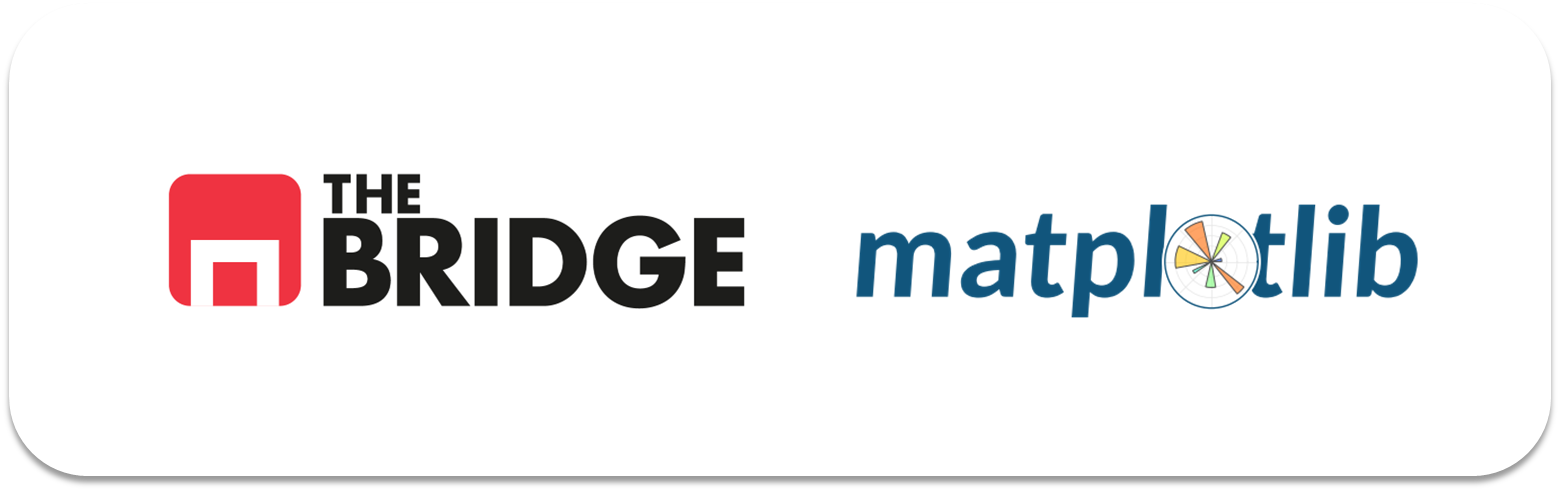

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [3]:
california_cities = pd.read_csv("./data/california_cities.csv")
california_cities = california_cities.dropna()

### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

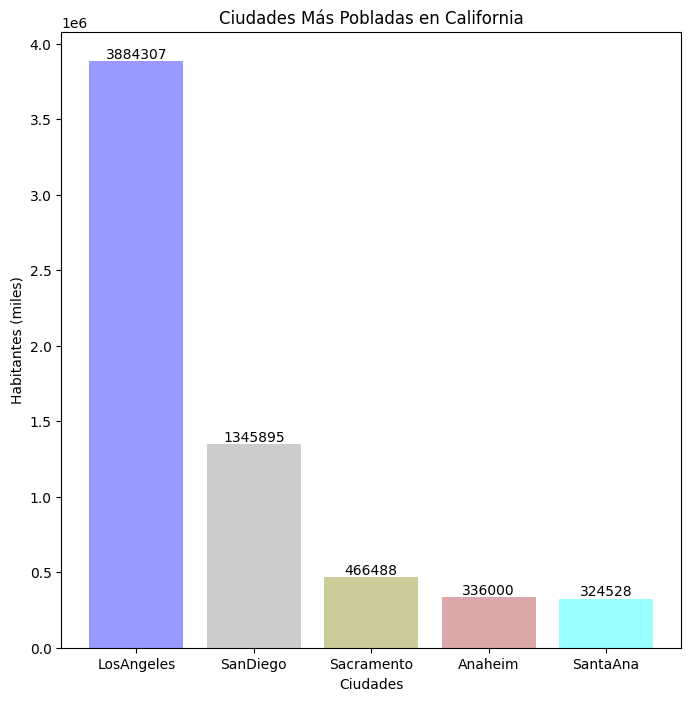

In [115]:
top_cities = california_cities.nlargest(5, 'population_total')

# Gráfico de barras para las ciudades más pobladas
plt.figure(figsize=(8, 8))
bars = plt.bar(top_cities['city'], top_cities['population_total'], color=['blue', 'gray', 'olive', 'brown', 'cyan'], alpha=0.4)
plt.xlabel('Ciudades')
plt.ylabel('Habitantes (miles)')
plt.title('Ciudades Más Pobladas en California')

# Añadiendo etiquetas de texto con la población en cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

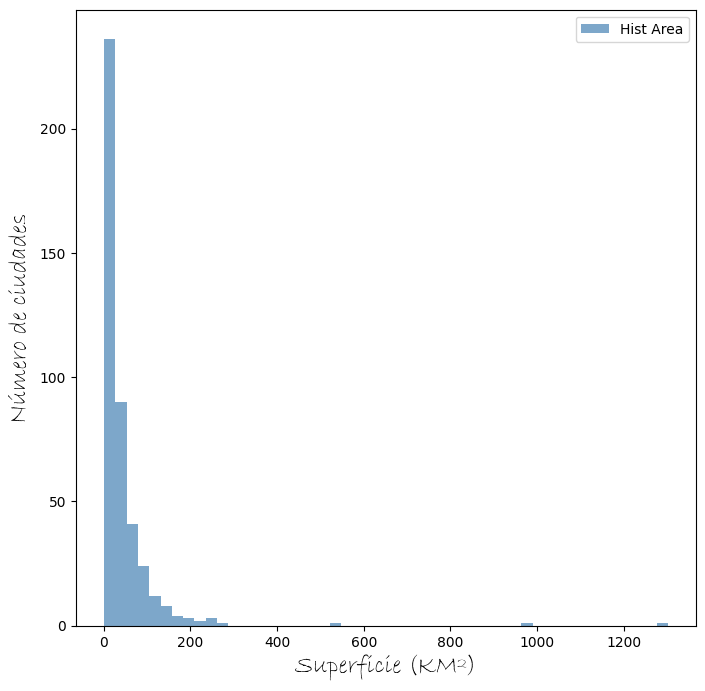

In [116]:
plt.figure(figsize=(8, 8))
n, bins, patches = plt.hist(california_cities['area_total_km2'], bins=50, color='steelblue', alpha=0.7, label='Hist Area')

# Configuración de los nombres de los ejes y la leyenda
plt.xlabel('Superficie (KM\u00b2)', fontname='Bradley Hand ITC', fontsize=18, style='italic')  # KM² en fuente predeterminada y en cursiva
plt.ylabel('Número de ciudades', fontname='Bradley Hand ITC', fontsize=18) # Número de ciudades en Bradley Hand ITC
plt.legend()

# Mostrando el histograma modificado
plt.show()

In [117]:
are_ov = [california_cities[california_cities['area_water_km2'] > 100]['area_water_km2'].iloc[0], california_cities[california_cities['area_water_km2'] > 100]['population_total'].iloc[0]]
pop_ov = [california_cities[california_cities['population_total'] > 3000000]['area_water_km2'].iloc[0], california_cities[california_cities['population_total'] > 3000000]['population_total'].iloc[0]]
print(are_ov, '   ', pop_ov)


[122.27, 1345895]     [88.0, 3884307]


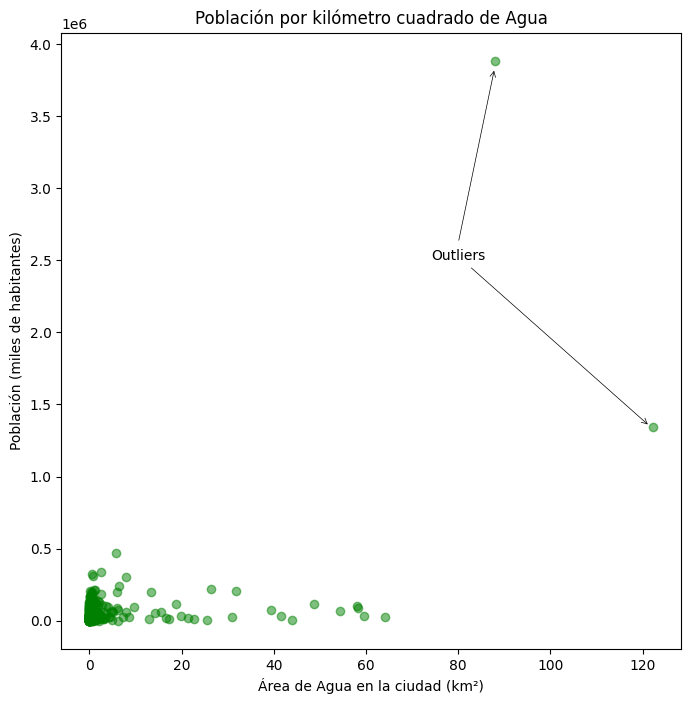

In [118]:
arrow_prop = dict(arrowstyle = '->', facecolor='black', linewidth =0.5)

# Gráfico de dispersión del área de agua de una ciudad contra su población
plt.figure(figsize=(8, 8))
plt.scatter(california_cities['area_water_km2'], california_cities['population_total'], alpha=0.5, color = 'g')
plt.xlabel('Área de Agua en la ciudad (km²)')
plt.ylabel('Población (miles de habitantes)')
plt.title('Población por kilómetro cuadrado de Agua')

# Añadiendo una etiqueta con flechas
plt.annotate('Outliers', xy=(are_ov[0] - 0.7, are_ov[1] + 3000), xytext=(80, 2500000),
             arrowprops=arrow_prop, ha='center')
plt.annotate('', xy=(pop_ov[0] - 0.1, pop_ov[1] - 50000), xytext=(80, 2620000),
             arrowprops=arrow_prop, ha='center')

plt.show()

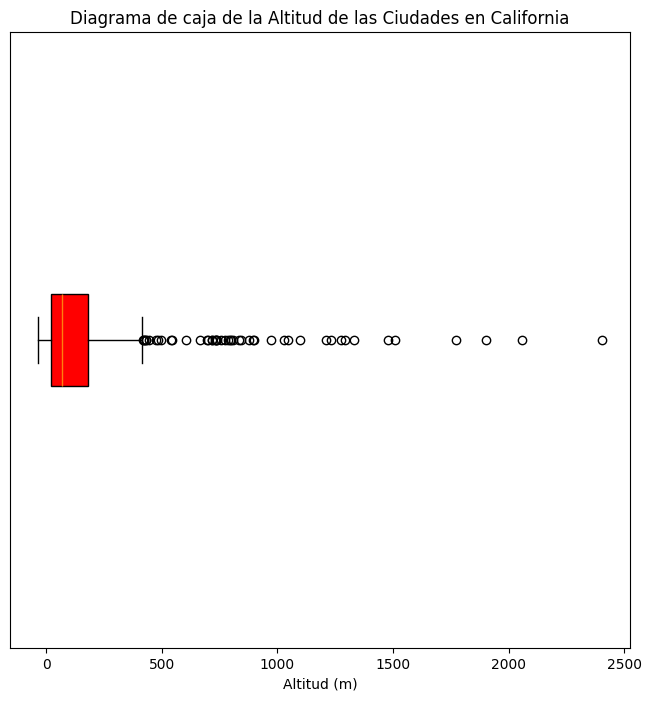

In [127]:
# Boxplot de la altura de las ciudades
plt.figure(figsize=(8, 8))
box = plt.boxplot(california_cities['elevation_m'], vert=False, patch_artist='True')

for patch in box['boxes']:
    patch.set_facecolor('red')

plt.xlabel('Altitud (m)')
plt.title('Diagrama de caja de la Altitud de las Ciudades en California')

# Mostrando solo el boxplot sin etiquetas adicionales en el eje x
plt.yticks([])

plt.show()

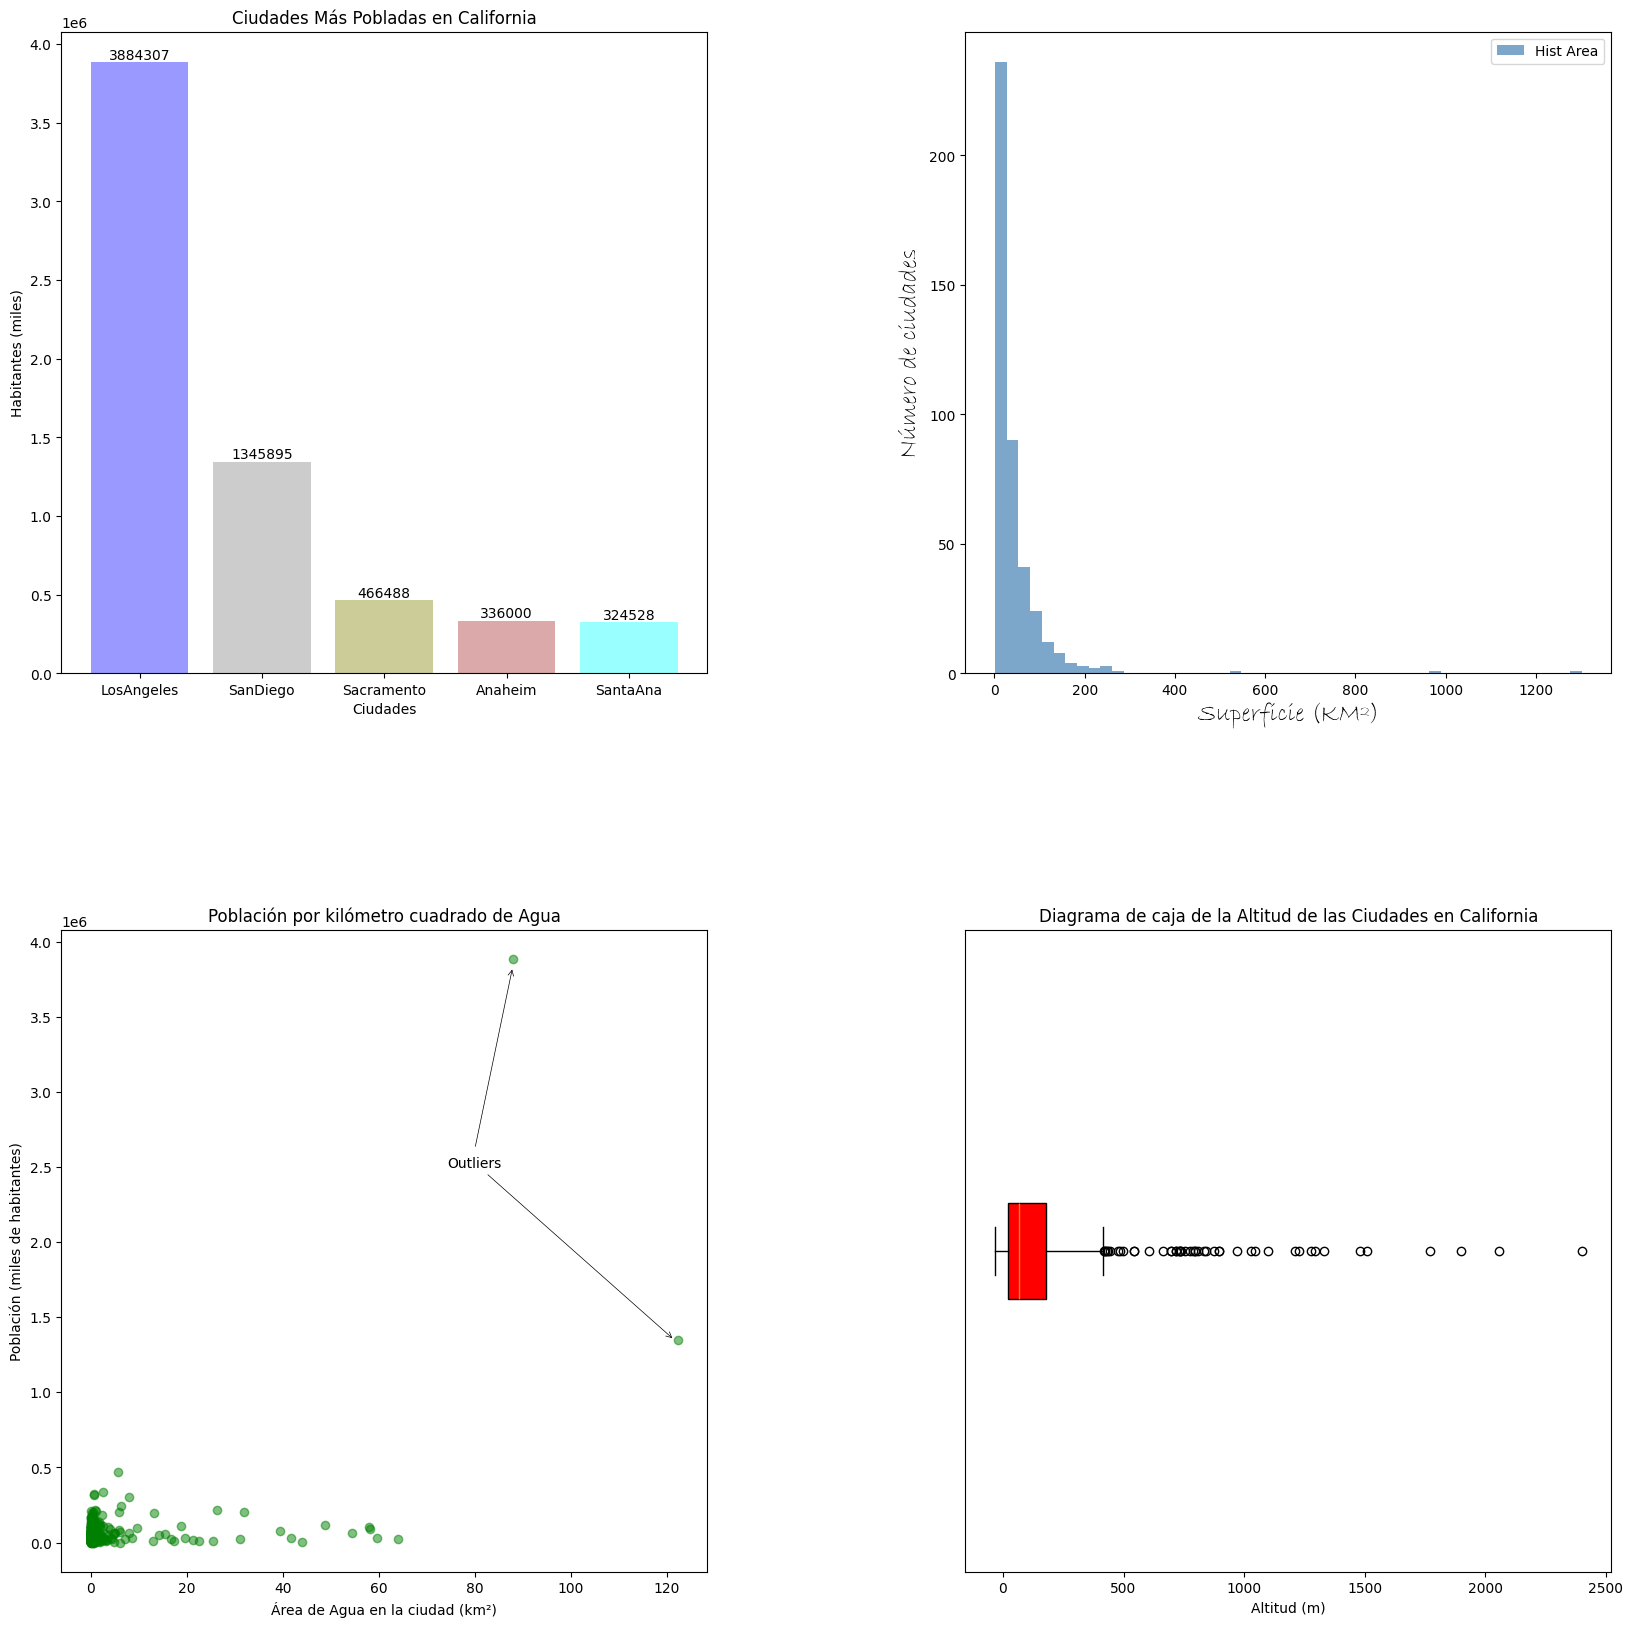

In [130]:
# Creación de una figura con subplots para combinar los gráficos
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Gráfico 1: Ciudades Más Pobladas
top_cities = california_cities.nlargest(5, 'population_total')
axs[0, 0].bar(top_cities['city'], top_cities['population_total'], color=['blue', 'gray', 'olive', 'brown', 'cyan'], alpha=0.4)
axs[0, 0].set_xlabel('Ciudades')
axs[0, 0].set_ylabel('Habitantes (miles)')
axs[0, 0].set_title('Ciudades Más Pobladas en California')
for bar in axs[0, 0].patches:
    axs[0, 0].annotate(format(bar.get_height(), '.0f'), 
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                       ha='center', va='bottom')

# Gráfico 2: Histograma del Área Total
axs[0, 1].hist(california_cities['area_total_km2'], bins=50, color='steelblue', alpha=0.7, label='Hist Area')
axs[0, 1].set_xlabel('Superficie (KM\u00b2)', fontname='Bradley Hand ITC', fontsize=18, style='italic')
axs[0, 1].set_ylabel('Número de ciudades', fontname='Bradley Hand ITC', fontsize=18)
axs[0, 1].legend()

# Gráfico 3: Scatter de Área de Agua vs Población
arrow_prop = dict(arrowstyle='->', facecolor='black', linewidth=0.5)
axs[1, 0].scatter(california_cities['area_water_km2'], california_cities['population_total'], alpha=0.5, color='g')
axs[1, 0].set_xlabel('Área de Agua en la ciudad (km²)')
axs[1, 0].set_ylabel('Población (miles de habitantes)')
axs[1, 0].set_title('Población por kilómetro cuadrado de Agua')

axs[1, 0].annotate('Outliers', xy=(are_ov[0] - 0.7, are_ov[1] + 3000), xytext=(80, 2500000),
             arrowprops=arrow_prop, ha='center')
axs[1, 0].annotate('', xy=(pop_ov[0] - 0.1, pop_ov[1] - 50000), xytext=(80, 2620000),
             arrowprops=arrow_prop, ha='center')

# Gráfico 4: Boxplot de la Elevación
box = axs[1, 1].boxplot(california_cities['elevation_m'], vert=False, patch_artist = True)

for patch in box['boxes']:
    patch.set_facecolor('red')

axs[1, 1].set_xlabel('Altitud (m)')
axs[1, 1].set_title('Diagrama de caja de la Altitud de las Ciudades en California')
axs[1, 1].set_yticks([])

plt.show()


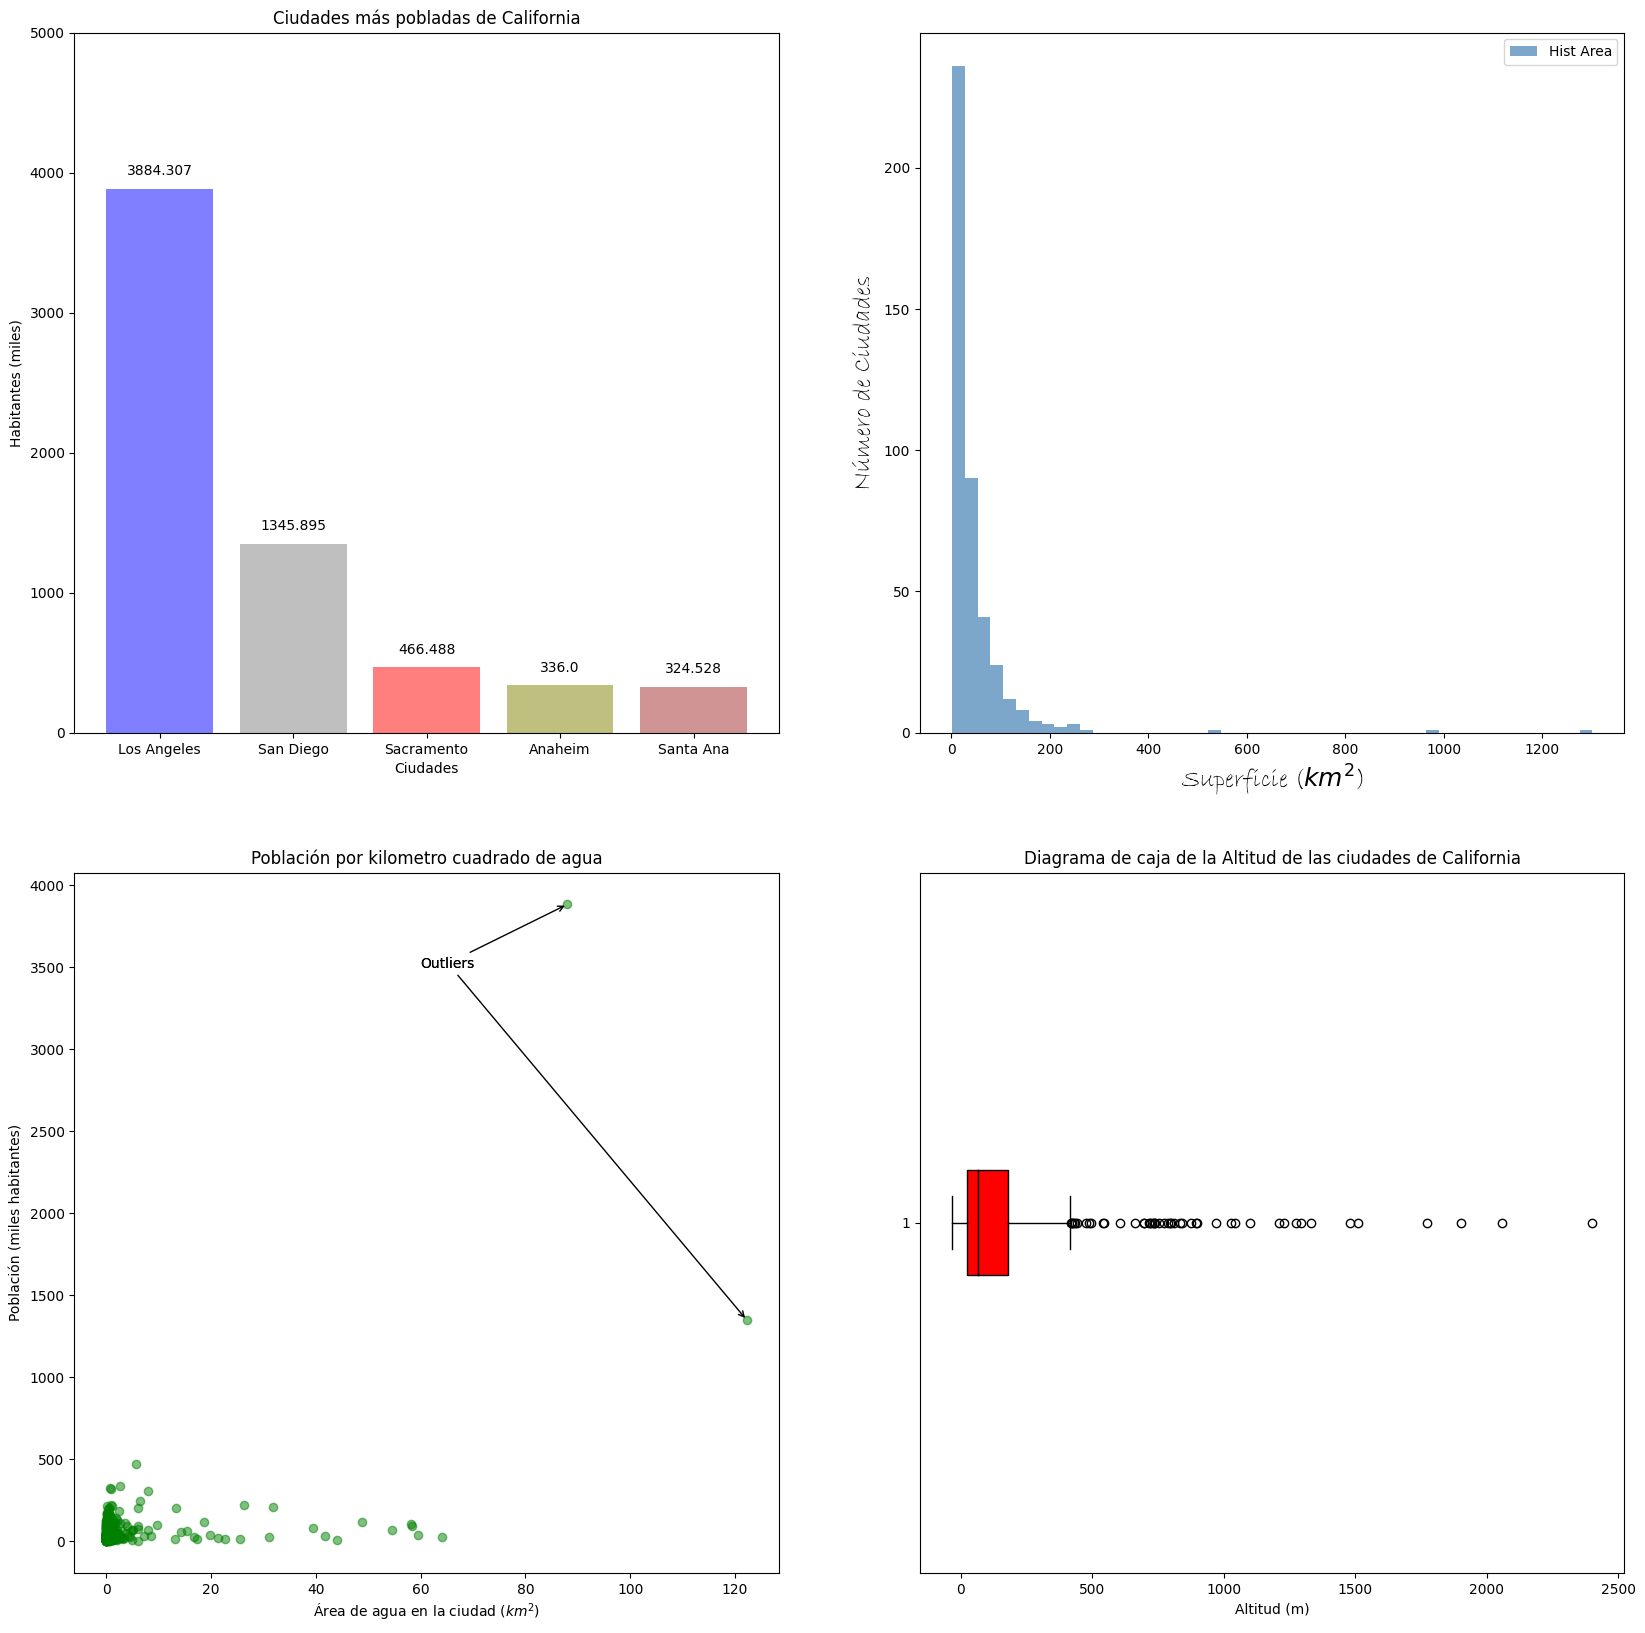

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.